In [1]:
import pandas as pd
df_cd4 = pd.read_csv('output_CD4.csv',index_col=0)
df_cd8 = pd.read_csv('output_CD8.csv',index_col=0)
df_cd8

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g
AAACCTGAGAGTAAGG-6,0.465180,0.205189,-0.060088,0.206079,0.420400,1.564994,0.093138
AAACCTGAGATCGATA-9,0.250605,0.048270,-0.210522,0.069605,0.300771,2.221850,0.210722
AAACCTGAGCGATATA-1,0.298355,0.227353,-0.007310,0.162567,0.616546,1.855140,0.037209
AAACCTGAGCGTGAGT-10,0.171393,0.048306,-0.170344,0.054180,0.189349,1.992893,0.287035
AAACCTGAGCTAGTGG-6,0.429897,0.120349,-0.118762,0.208290,0.182770,2.171230,0.264223
...,...,...,...,...,...,...,...
TTTGTCATCGAGAACG-8,0.299511,0.175690,0.020849,0.177551,0.463982,1.844501,0.164499
TTTGTCATCGCATGGC-2,0.395975,0.174421,0.072853,0.224538,0.510726,1.767948,0.127668
TTTGTCATCGTAGGTT-4,0.326490,0.078522,-0.195484,0.090854,0.287302,2.335345,0.293491
TTTGTCATCTCCTATA-6,0.330377,0.152483,0.016853,0.324649,0.575491,2.058828,0.370106


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8Lowery_pos_243g", 
    "CD8Oliveira_TTE_100g", 
    "CD8Oliveira_pos_74g", 
    "CD8Yost_CD8_Exh_100g", 
    "ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    #"CD8Lowery_neg_99g",
    "ave_Hanada_neg_5g", 
    "ave_Oliveira_virus_26g"
]

pos_sigs_CD4 = [
    "Hanada_pos_9g", 
    "CD4Caushi_Tfh2_66g", 
    #"CD4Jansen_TermDiff_73g", 
    "CD4Lowery_pos_40g", 
    "CD4Oh_CXCL13_50g"
]
neg_sigs_CD4 = [
    "CD4Lowery_neg_37g", 
    "Hanada_neg_4g"
]

def classify_cells(df, cell_type, pos_sigs, neg_sigs):
    sub = df.copy()
    cols = pos_sigs + neg_sigs

    # z‐score the signatures _within_ this subset
    sub[cols] = sub[cols].apply(zscore)

    # compute mean “pos” and “neg” scores
    sub[f"pos_score_{cell_type}"] = sub[pos_sigs].mean(axis=1)
    sub[f"neg_score_{cell_type}"] = sub[neg_sigs].mean(axis=1)

    # pick cutoffs (here: median)
    pos_cut = sub[f"pos_score_{cell_type}"].median()
    neg_cut = sub[f"neg_score_{cell_type}"].median()

    # classify per cell
    sub[f"cancer_reactive_per_cell_{cell_type}"] = (
        (sub[f"pos_score_{cell_type}"] >  pos_cut) &
        (sub[f"neg_score_{cell_type}"] <  neg_cut)
    )

    return sub, pos_cut, neg_cut

# run it for each cell‐type
cd8_called,pos_cut_CD8, neg_cut_CD8= classify_cells(df_cd8, "CD8", pos_sigs_CD8, neg_sigs_CD8)
cd4_called,pos_cut_CD4, neg_cut_CD4 = classify_cells(df_cd4, "CD4", pos_sigs_CD4, neg_sigs_CD4)
cd8_called

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAGTAAGG-6,1.108468,0.746065,-0.169220,0.139694,-0.010139,-0.574024,-1.022367,0.362973,-0.798196,True
AAACCTGAGATCGATA-9,-1.130483,-1.166948,-1.584679,-1.319357,-0.736300,1.195857,0.150206,-1.187554,0.673031,False
AAACCTGAGCGATATA-1,-0.632242,1.016279,0.327376,-0.325497,1.180488,0.207765,-1.580108,0.313281,-0.686171,True
AAACCTGAGCGTGAGT-10,-1.957014,-1.166509,-1.206637,-1.484262,-1.412643,0.578937,0.911211,-1.445413,0.745074,False
AAACCTGAGCTAGTGG-6,0.740315,-0.288228,-0.721297,0.163325,-1.452575,1.059462,0.683728,-0.311692,0.871595,False
...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGAGAACG-8,-0.620184,0.386446,0.592330,-0.165307,0.254413,0.179100,-0.310739,0.089540,-0.065820,False
TTTGTCATCGCATGGC-2,0.386365,0.370971,1.081647,0.337039,0.538153,-0.027170,-0.678026,0.542835,-0.352598,True
TTTGTCATCGTAGGTT-4,-0.338668,-0.798145,-1.443182,-1.092180,-0.818056,1.501666,0.975596,-0.898046,1.238631,False
TTTGTCATCTCCTATA-6,-0.298114,0.103521,0.554730,1.407331,0.931282,0.756598,1.739613,0.539750,1.248106,False


In [3]:
df_combined = pd.concat([cd4_called, cd8_called],
                     axis=0,          # stack rows
                     ignore_index=False,
                     sort=False)
df_combined

/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CD4Caushi_Tfh2_66g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8
AAACCTGAGAGTACCG-1,0.958507,-1.737349,1.321544,-0.115564,1.617988,-1.419163,0.945619,-1.578256,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGATCTGCT-3,-0.422901,-0.432401,-1.172001,0.504839,-0.314084,-2.036512,-0.351037,-1.234457,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGCAATATG-1,1.610030,-1.683655,2.523147,-0.261785,-1.162645,0.411602,0.677187,-0.636027,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGCACACAG-1,-0.522188,-1.657047,0.220721,-1.318962,-1.325521,-1.002038,-0.736487,-1.329543,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGCGGCTTC-6,-0.699388,0.446896,-0.351185,-0.649200,-0.398596,-0.024366,-0.524592,0.211265,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGAGAACG-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.620184,0.386446,0.592330,-0.165307,0.254413,0.179100,-0.310739,0.089540,-0.065820,False
TTTGTCATCGCATGGC-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386365,0.370971,1.081647,0.337039,0.538153,-0.027170,-0.678026,0.542835,-0.352598,True
TTTGTCATCGTAGGTT-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.338668,-0.798145,-1.443182,-1.092180,-0.818056,1.501666,0.975596,-0.898046,1.238631,False
TTTGTCATCTCCTATA-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.298114,0.103521,0.554730,1.407331,0.931282,0.756598,1.739613,0.539750,1.248106,False


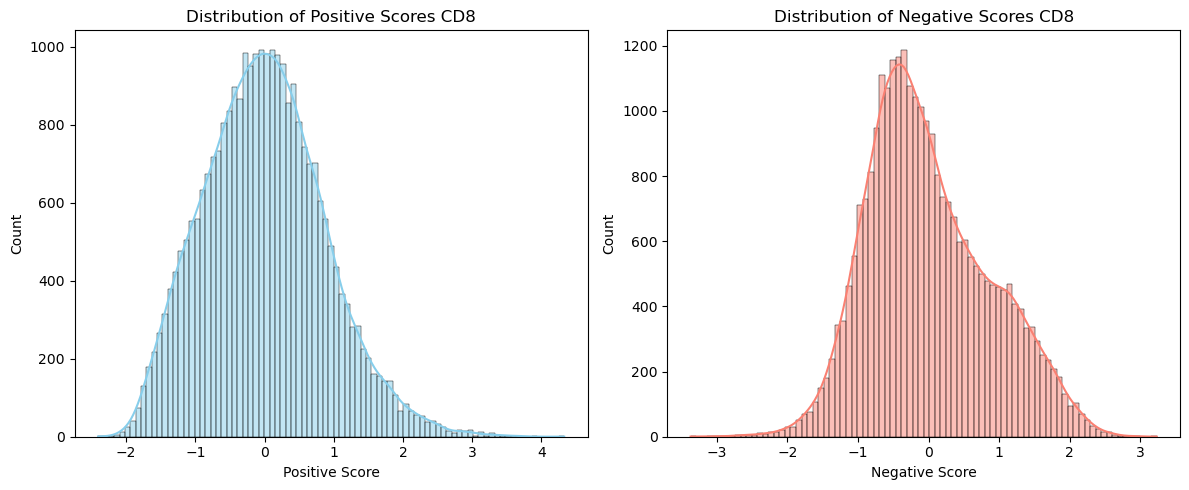

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cd8_called['pos_score_CD8'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd8_called['neg_score_CD8'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

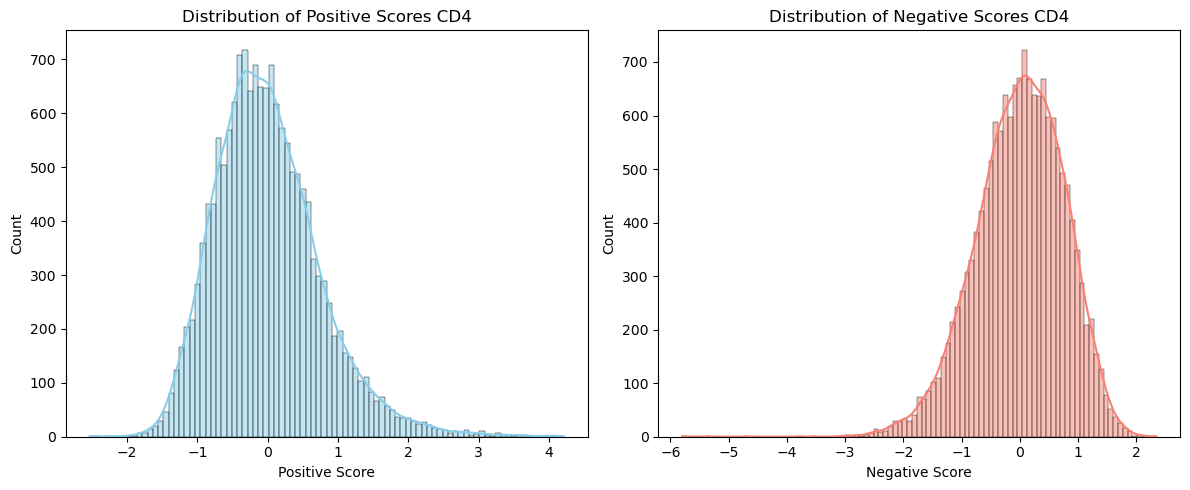

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cd4_called['pos_score_CD4'], kde=True, color='skyblue')
plt.title('Distribution of Positive Scores CD4')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(cd4_called['neg_score_CD4'], kde=True, color='salmon')
plt.title('Distribution of Negative Scores CD4')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

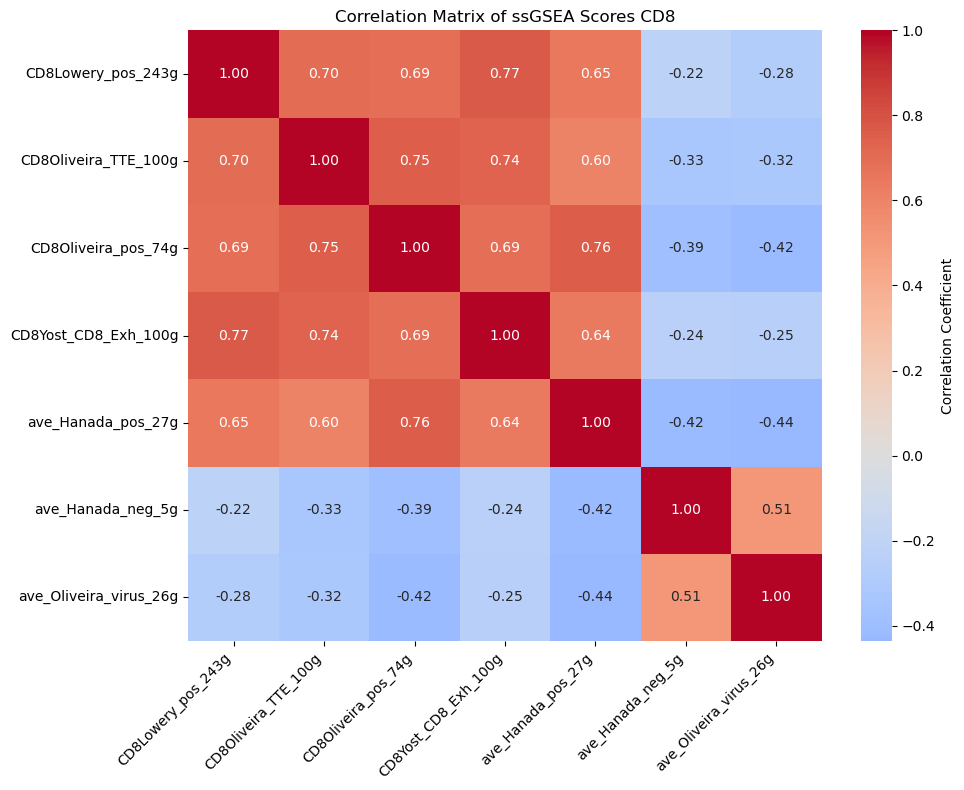

In [6]:
# Combine the lists to get all columns
all_sigs_CD8 = pos_sigs_CD8 + neg_sigs_CD8

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd8_called[all_sigs_CD8].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

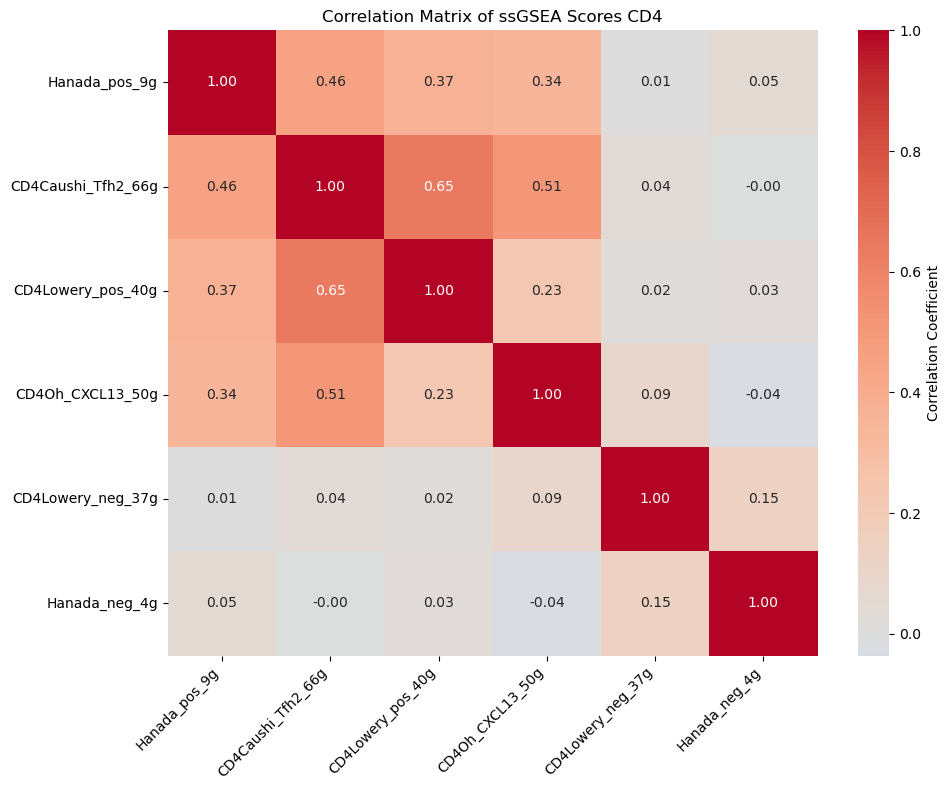

In [7]:
# Combine the lists to get all columns
all_sigs_CD4 = pos_sigs_CD4 + neg_sigs_CD4

# Calculate the correlation matrix for the specified columns in the original DataFrame
corr_matrix = cd4_called[all_sigs_CD4].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})

plt.title("Correlation Matrix of ssGSEA Scores CD4")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Clustering based on signature genes

In [8]:
import pickle
with open("signatures_CD8.pkl", "rb") as f:
    sigs_CD8 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD8.items()})

with open("signatures_CD4.pkl", "rb") as f:
    sigs_CD4 = pickle.load(f)

print({k: len(v) for k, v in sigs_CD4.items()})

del sigs_CD4['Jansen_TermDiff_73g']
del sigs_CD8['Lowery_neg_99g']

{'Lowery_pos_243g': 243, 'Oliveira_TTE_100g': 100, 'Oliveira_pos_74g': 74, 'Yost_CD8_Exh_100g': 100, 'Hanada_pos_27g': 27, 'Lowery_neg_99g': 99, 'Oliveira_virus_26g': 26, 'Hanada_neg_5g': 5}
{'Lowery_pos_40g': 40, 'Jansen_TermDiff_73g': 73, 'Caushi_Tfh2_66g': 66, 'Oh_CXCL13_50g': 50, 'Hanada_pos_9g': 9, 'Lowery_neg_37g': 37, 'Hanada_neg_4g': 4}


In [9]:
import scanpy as sc
import glob
import os
import anndata

counts = pd.read_csv(
    "GSE221776_sc_PBT_CD8_umi.txt.gz",
    sep="\t",
    compression="gzip"
)
counts.set_index(counts.columns[0], inplace=True) 


# Load the cell annotation table
anno = pd.read_csv(
    "GSE221776_sc_PBT_CD8_annotation.txt.gz",
    sep="\t",
    compression="gzip",
    index_col=0
)
anno.index.name = "cell_name"

# Build a sparse matrix of shape (cells × genes)
#    (transpose your genes×cells DataFrame and convert to CSR)
X = counts.T.values

# Create a var DataFrame
var = pd.DataFrame(index=counts.index)

# Build the AnnData
adata_concat = anndata.AnnData(
    X=X,
    obs=anno,   # rows = cells
    var=var     # rows = genes
)

In [10]:
counts = pd.read_csv(
    "GSE221776_sc_PBT_CD4_umi.txt.gz",
    sep="\t",
    compression="gzip"
)
counts.set_index(counts.columns[0], inplace=True) 


# Load the cell annotation table
anno = pd.read_csv(
    "GSE221776_sc_PBT_CD4_annotation.txt.gz",
    sep="\t",
    compression="gzip",
    index_col=0
)
anno.index.name = "cell_name"

# Build a sparse matrix of shape (cells × genes)
#    (transpose your genes×cells DataFrame and convert to CSR)
X = counts.T.values

# Create a var DataFrame
var = pd.DataFrame(index=counts.index)

# Build the AnnData
adata_concat_CD4 = anndata.AnnData(
    X=X,
    obs=anno,   # rows = cells
    var=var     # rows = genes
)

In [11]:
all_genes_flat_CD8 = [item for sublist in sigs_CD8.values() for item in sublist]
all_genes_flat_CD4 = [item for sublist in sigs_CD4.values() for item in sublist]
subset_genes_CD8 = list(set(all_genes_flat_CD8))
subset_genes_CD4 = list(set(all_genes_flat_CD4))

In [12]:
matched_genes_CD8 = []
matched_genes_CD4 = []

for s1 in subset_genes_CD8:
    if s1 in list(adata_concat.var.index):
        matched_genes_CD8.append(s1)
for s1 in subset_genes_CD4:
    if s1 in list(adata_concat_CD4.var.index):
        matched_genes_CD4.append(s1)    
# Print match info
print(f" {len(matched_genes_CD4)}/{len(subset_genes_CD4)} CD4 genes are found.")
print(f" {len(matched_genes_CD8)}/{len(subset_genes_CD8)} CD8 genes are found.")

 156/164 CD4 genes are found.
 380/396 CD8 genes are found.


/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/app/software/umap-learn/0.5.3-foss-2022b/lib/python3.10

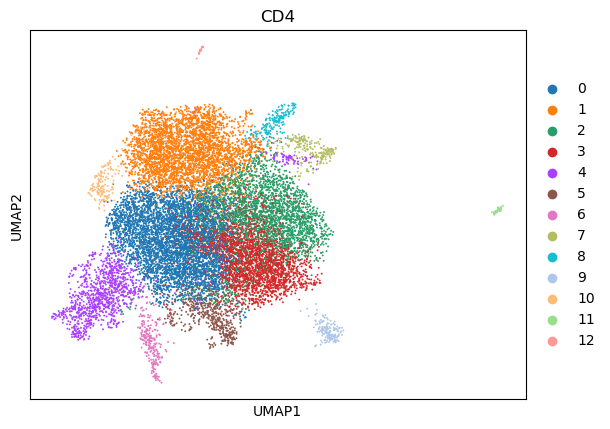

/app/software/scanpy/1.9.3-foss-2022b/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


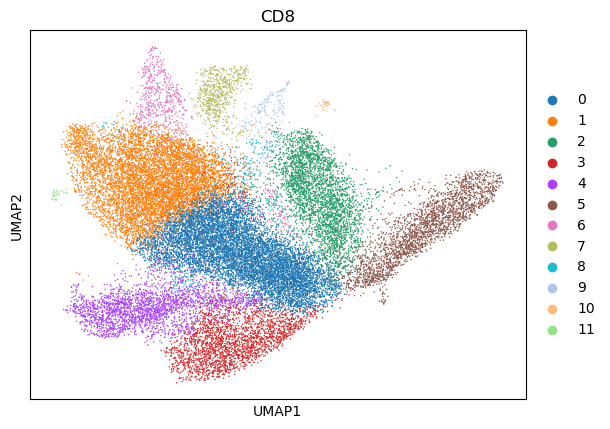

In [13]:
%matplotlib inline
def run_cluster(sub_adata, key: str):
    sc.pp.scale(sub_adata)
    sc.tl.pca(sub_adata, svd_solver="arpack")
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(sub_adata)
    sc.tl.leiden(sub_adata, resolution=0.5)
    sc.pl.umap(sub_adata, color="leiden", title=key)
    return sub_adata.obs["leiden"].rename(f"cluster_{key}")

leiden_cd4 = run_cluster(adata_concat_CD4[:, matched_genes_CD4].copy(), "CD4")
leiden_cd8 = run_cluster(adata_concat[:, matched_genes_CD8].copy(), "CD8")

clusters_wide = pd.concat([leiden_cd4, leiden_cd8], axis=1)


In [14]:
merged_df = df_combined.join(clusters_wide[['cluster_CD4','cluster_CD8']])

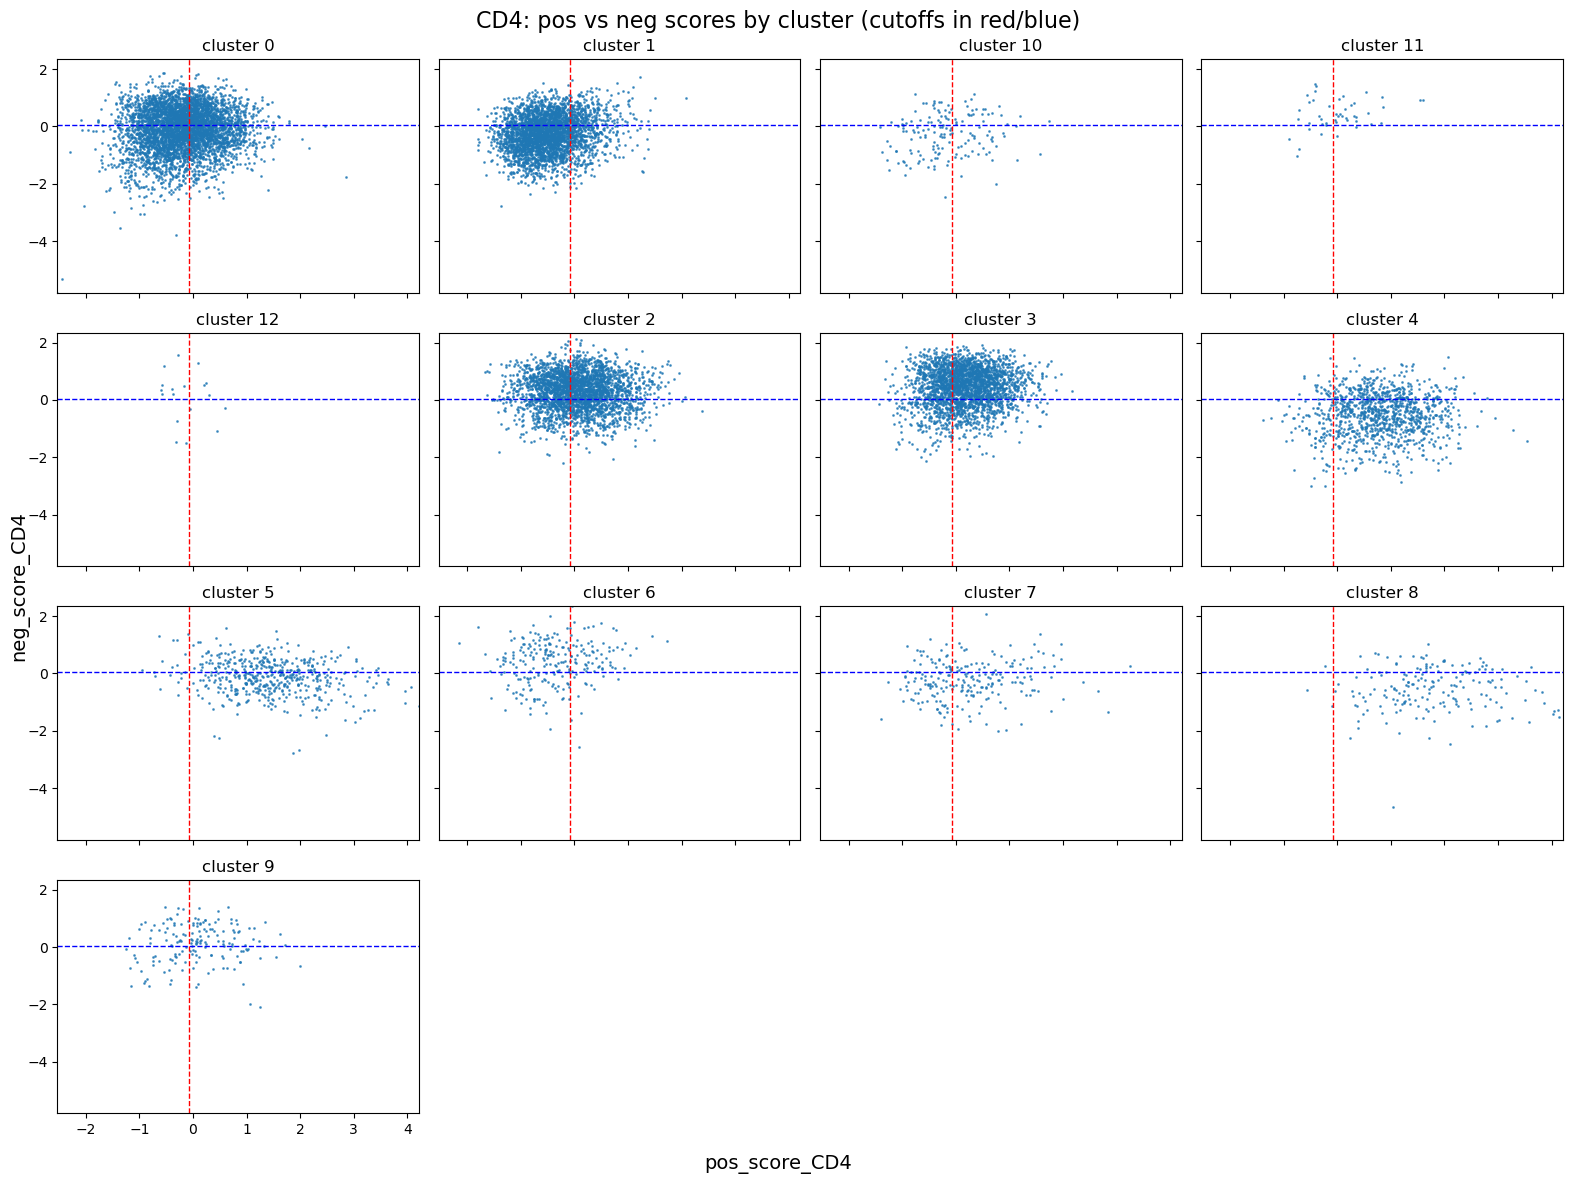

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

clusters = [c for c in merged_df['cluster_CD4'].unique() if pd.notna(c)]
clusters = sorted(clusters)

# global axis limits
xmin, xmax = merged_df['pos_score_CD4'].min(), merged_df['pos_score_CD4'].max()
ymin, ymax = merged_df['neg_score_CD4'].min(), merged_df['neg_score_CD4'].max()

# layout
n = len(clusters)
ncols = 4
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(4*ncols, 3*nrows),
    sharex=True, sharey=True
)

for ax, clu in zip(axes.flat, clusters):
    sub = merged_df[merged_df['cluster_CD4'] == clu]
    
    # scatter
    ax.scatter(
        sub['pos_score_CD4'],
        sub['neg_score_CD4'],
        s=1,
        alpha=0.7
    )
    
    # means
    # mean_x = sub['pos_score_CD4'].mean()
    # mean_y = sub['neg_score_CD4'].mean()
    
    # # vertical & horizontal lines
    # ax.axvline(mean_x, color='red', linestyle='--', linewidth=1)
    # ax.axhline(mean_y, color='blue', linestyle='--', linewidth=1)

    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# turn off any unused subplots
for ax in axes.flat[n:]:
    ax.axis('off')

# global labels & title
fig.supxlabel('pos_score_CD4', fontsize=14)
fig.supylabel('neg_score_CD4', fontsize=14)
fig.suptitle('CD4: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

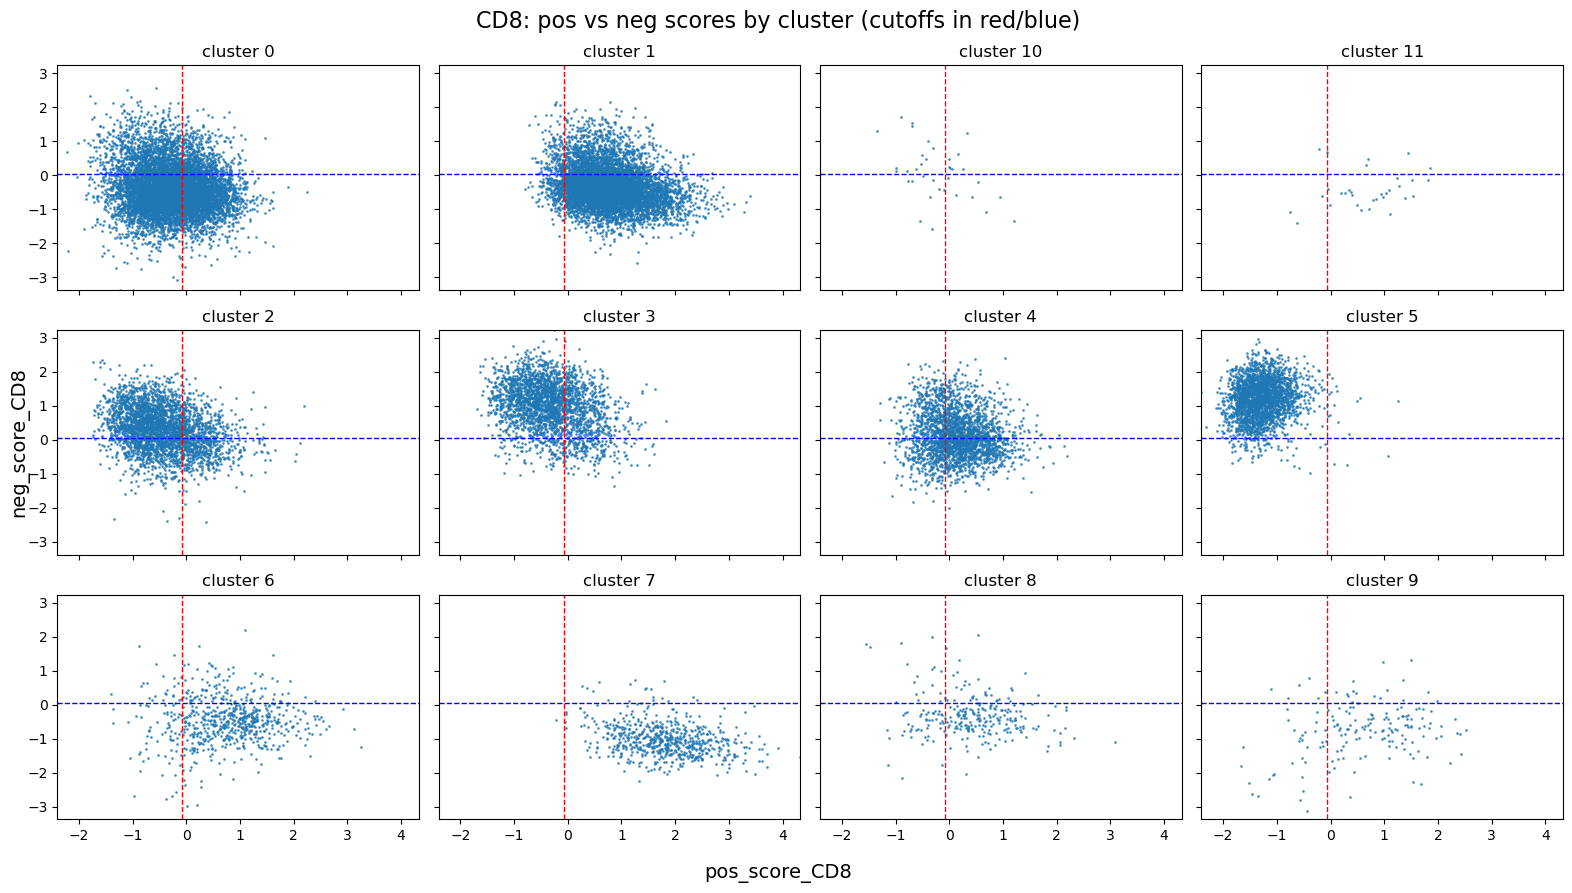

In [16]:
clusters_cd8 = [c for c in merged_df['cluster_CD8'].unique() if pd.notna(c)]
clusters_cd8 = sorted(clusters_cd8)

# compute global axis limits for CD8
xmin8, xmax8 = merged_df['pos_score_CD8'].min(), merged_df['pos_score_CD8'].max()
ymin8, ymax8 = merged_df['neg_score_CD8'].min(), merged_df['neg_score_CD8'].max()

# layout: 4 columns, as many rows as needed
n8 = len(clusters_cd8)
ncols8 = 4
nrows8 = int(np.ceil(n8 / ncols8))

fig8, axes8 = plt.subplots(
    nrows8, ncols8,
    figsize=(4*ncols8, 3*nrows8),
    sharex=True, sharey=True
)

for ax, clu in zip(axes8.flat, clusters_cd8):
    sub8 = merged_df[merged_df['cluster_CD8'] == clu]
    
    # scatter
    ax.scatter(
        sub8['pos_score_CD8'],
        sub8['neg_score_CD8'],
        s=1,
        alpha=0.7
    )
    
    # cluster means
    # mean_x8 = sub8['pos_score_CD8'].mean()
    # mean_y8 = sub8['neg_score_CD8'].mean()
    
    # # draw mean lines
    # ax.axvline(mean_x8, color='red', linestyle='--', linewidth=1)
    # ax.axhline(mean_y8, color='blue', linestyle='--', linewidth=1)
    
    ax.axvline(pos_cut_CD4, color='red', linestyle='--', linewidth=1)
    ax.axhline(neg_cut_CD4, color='blue', linestyle='--', linewidth=1)
    
    ax.set_title(f'cluster {int(clu)}')
    ax.set_xlim(xmin8, xmax8)
    ax.set_ylim(ymin8, ymax8)

# disable unused subplots
for ax in axes8.flat[n8:]:
    ax.axis('off')

# global labels & title
fig8.supxlabel('pos_score_CD8', fontsize=14)
fig8.supylabel('neg_score_CD8', fontsize=14)
fig8.suptitle('CD8: pos vs neg scores by cluster (cutoffs in red/blue)', fontsize=16)

plt.tight_layout()
plt.show()

In [17]:
merged_df["CD_type_by_cluster"] = merged_df["cluster_CD4"].notna().map({True: "CD4", False: "CD8"})

In [18]:
merged_df["cluster"] = merged_df.apply(
    lambda r: r["cluster_CD4"] if r["CD_type_by_cluster"] == "CD4"
              else r["cluster_CD8"],
    axis=1
)

merged_df["cancer_reactive_per_cell"] = merged_df.apply(
    lambda r: r["cancer_reactive_per_cell_CD4"] if r["CD_type_by_cluster"] == "CD4"
              else r["cancer_reactive_per_cell_CD8"],
    axis=1
)

# Group by both cell_type & cluster and compute the fraction reactive
cluster_frac = (
    merged_df
    .groupby(["CD_type_by_cluster", "cluster"])["cancer_reactive_per_cell"]
    .mean()
    .rename("reactive_fraction")
)

cluster_frac_df = cluster_frac.reset_index()
cluster_frac_df

,CD_type_by_cluster,cluster,reactive_fraction
0,CD4,0,0.217264
1,CD4,1,0.104756
2,CD4,10,0.222222
3,CD4,11,0.043478
4,CD4,12,0.166667
5,CD4,2,0.195260
6,CD4,3,0.157537
7,CD4,4,0.668773
8,CD4,5,0.581532
9,CD4,6,0.049383


In [19]:
#  threshold and collect all (cell_type, cluster) pairs above it
threshold = 0.4
reactive_pairs = set(
    cluster_frac[cluster_frac > threshold].index
)

reactive_pairs


{('CD4', '4'),
 ('CD4', '5'),
 ('CD4', '8'),
 ('CD8', '1'),
 ('CD8', '11'),
 ('CD8', '6'),
 ('CD8', '7'),
 ('CD8', '8'),
 ('CD8', '9')}

In [20]:
# map back to every cell
merged_df["cancer_reactive_by_cluster"] = merged_df.apply(
    lambda r: True
              if (r["CD_type_by_cluster"], r["cluster"]) in reactive_pairs
              else False,
    axis=1
)
merged_df

/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/app/software/IPython/8.14.0-GCCcore-12.2.0/lib/python3.10/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CD4Caushi_Tfh2_66g,CD4Lowery_neg_37g,CD4Lowery_pos_40g,CD4Oh_CXCL13_50g,Hanada_pos_9g,Hanada_neg_4g,pos_score_CD4,neg_score_CD4,cancer_reactive_per_cell_CD4,CD8Lowery_pos_243g,...,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD4,cluster_CD8,CD_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster
AAACCTGAGAGTACCG-1,0.958507,-1.737349,1.321544,-0.115564,1.617988,-1.419163,0.945619,-1.578256,True,NaN,...,NaN,NaN,NaN,NaN,4,NaN,CD4,4,True,True
AAACCTGAGATCTGCT-3,-0.422901,-0.432401,-1.172001,0.504839,-0.314084,-2.036512,-0.351037,-1.234457,False,NaN,...,NaN,NaN,NaN,NaN,7,NaN,CD4,7,False,False
AAACCTGAGCAATATG-1,1.610030,-1.683655,2.523147,-0.261785,-1.162645,0.411602,0.677187,-0.636027,True,NaN,...,NaN,NaN,NaN,NaN,4,NaN,CD4,4,True,True
AAACCTGAGCACACAG-1,-0.522188,-1.657047,0.220721,-1.318962,-1.325521,-1.002038,-0.736487,-1.329543,False,NaN,...,NaN,NaN,NaN,NaN,0,NaN,CD4,0,False,False
AAACCTGAGCGGCTTC-6,-0.699388,0.446896,-0.351185,-0.649200,-0.398596,-0.024366,-0.524592,0.211265,False,NaN,...,NaN,NaN,NaN,NaN,2,NaN,CD4,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGAGAACG-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.620184,...,-0.310739,0.089540,-0.065820,False,NaN,4,CD8,4,False,False
TTTGTCATCGCATGGC-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386365,...,-0.678026,0.542835,-0.352598,True,NaN,1,CD8,1,True,True
TTTGTCATCGTAGGTT-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.338668,...,0.975596,-0.898046,1.238631,False,NaN,5,CD8,5,False,False
TTTGTCATCTCCTATA-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.298114,...,1.739613,0.539750,1.248106,False,NaN,4,CD8,4,False,False


In [25]:
out_CD4 = merged_df[merged_df["CD_type_by_cluster"]=='CD4']
out_CD8 = merged_df[merged_df["CD_type_by_cluster"]=='CD8']
out_CD8 = out_CD8.dropna(axis=1, how='all')
out_CD4 = out_CD4.dropna(axis=1, how='all')
pd.set_option('display.max_columns', None)
out_CD8

,CD8Lowery_pos_243g,CD8Oliveira_TTE_100g,CD8Oliveira_pos_74g,CD8Yost_CD8_Exh_100g,ave_Hanada_pos_27g,ave_Hanada_neg_5g,ave_Oliveira_virus_26g,pos_score_CD8,neg_score_CD8,cancer_reactive_per_cell_CD8,cluster_CD8,CD_type_by_cluster,cluster,cancer_reactive_per_cell,cancer_reactive_by_cluster
AAACCTGAGAGTAAGG-6,1.108468,0.746065,-0.169220,0.139694,-0.010139,-0.574024,-1.022367,0.362973,-0.798196,True,4,CD8,4,True,False
AAACCTGAGATCGATA-9,-1.130483,-1.166948,-1.584679,-1.319357,-0.736300,1.195857,0.150206,-1.187554,0.673031,False,2,CD8,2,False,False
AAACCTGAGCGATATA-1,-0.632242,1.016279,0.327376,-0.325497,1.180488,0.207765,-1.580108,0.313281,-0.686171,True,0,CD8,0,True,False
AAACCTGAGCGTGAGT-10,-1.957014,-1.166509,-1.206637,-1.484262,-1.412643,0.578937,0.911211,-1.445413,0.745074,False,5,CD8,5,False,False
AAACCTGAGCTAGTGG-6,0.740315,-0.288228,-0.721297,0.163325,-1.452575,1.059462,0.683728,-0.311692,0.871595,False,1,CD8,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGAGAACG-8,-0.620184,0.386446,0.592330,-0.165307,0.254413,0.179100,-0.310739,0.089540,-0.065820,False,4,CD8,4,False,False
TTTGTCATCGCATGGC-2,0.386365,0.370971,1.081647,0.337039,0.538153,-0.027170,-0.678026,0.542835,-0.352598,True,1,CD8,1,True,True
TTTGTCATCGTAGGTT-4,-0.338668,-0.798145,-1.443182,-1.092180,-0.818056,1.501666,0.975596,-0.898046,1.238631,False,5,CD8,5,False,False
TTTGTCATCTCCTATA-6,-0.298114,0.103521,0.554730,1.407331,0.931282,0.756598,1.739613,0.539750,1.248106,False,4,CD8,4,False,False


In [26]:
out_CD8.to_csv("cell_meta_data_CD8.csv", index=True)
out_CD4.to_csv("cell_meta_data_CD4.csv", index=True)

In [23]:
import pandas as pd
cell_data_CD8 = pd.read_csv('cell_meta_data_CD8_cleaned.csv', index_col = 0)
cell_data_CD8["cancer_reactive"] = (
    cell_data_CD8["cancer_reactive_per_cell"] 
  & cell_data_CD8["cancer_reactive_by_cluster"]
)
cell_data_CD8

FileNotFoundError: [Errno 2] No such file or directory: 'cell_meta_data_CD8_cleaned.csv'

In [ ]:
mask = (
    cell_data_CD8['cdr3(Beta)'].notna() & (cell_data_CD8['cdr3(Beta)'] != 'None') &
    cell_data_CD8['cdr3(Alpha)'].notna() & (cell_data_CD8['cdr3(Alpha)'] != 'None')
)
cell_data_CD8 = cell_data_CD8[mask]
cell_data_CD8

In [ ]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# ---  short aliases to match dataframe -------------------
# ------------------------------------------------------------------
A_V   = 'v_gene(Alpha)'
A_J   = 'j_gene(Alpha)'
A_CDR = 'cdr3(Alpha)'
B_V   = 'v_gene(Beta)'
B_J   = 'j_gene(Beta)'
B_CDR = 'cdr3(Beta)'

SAMPLE = 'library.id'
# ------------------------------------------------------------------
#   ---  aggregation function ------------------------------------
# ------------------------------------------------------------------
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD8' : df['pos_score_CD8'].mean(),
        'mean_neg_score_CD8' : df['neg_score_CD8'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD8
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df

In [ ]:
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

In [ ]:
tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)

In [ ]:
cell_data_CD4 = pd.read_csv('cell_meta_data_CD4_cleaned.csv', index_col = 0)
cell_data_CD4["cancer_reactive"] = (
    cell_data_CD4["cancer_reactive_per_cell"] 
  & cell_data_CD4["cancer_reactive_by_cluster"]
)
mask = (
    cell_data_CD4['cdr3(Beta)'].notna() & (cell_data_CD4['cdr3(Beta)'] != 'None') &
    cell_data_CD4['cdr3(Alpha)'].notna() & (cell_data_CD4['cdr3(Alpha)'] != 'None')
)
cell_data_CD4 = cell_data_CD4[mask]
def summarise_clonotype(df: pd.DataFrame) -> pd.Series:

    counts_per_sample = df.groupby(SAMPLE).size()
    abundance_per_sample = ','.join(counts_per_sample.astype(str))

    total_reactive = df['cancer_reactive'].sum()
    reactive_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(str)
    counts_per_sample = df.groupby(SAMPLE)['cancer_reactive'].sum().astype(int)
    reactive_per_sample = ','.join(counts_per_sample.astype(str))

    return pd.Series({
        'alpha_v_gene' : df[A_V].iloc[0],
        'alpha_j_gene' : df[A_J].iloc[0],
        'alpha_cdr3'   : df[A_CDR].iloc[0],
        'beta_v_gene'  : df[B_V].iloc[0],
        'beta_j_gene'  : df[B_J].iloc[0],
        'beta_cdr3'    : df[B_CDR].iloc[0],

        # --- mean signature scores directly from the four columns ---
        'mean_pos_score_CD4' : df['pos_score_CD4'].mean(),
        'mean_neg_score_CD4' : df['neg_score_CD4'].mean(),


        # --- (Optional) concatenate every predicted label present in the group ---
        #'predicted_celltype' : ','.join(df[PREDICTED_COL].astype(str).unique()),
        'SAMPLE' : ','.join(df[SAMPLE].astype(str).unique()),
        
        'num_cells'     : len(df),
        'cells_per_sample' : abundance_per_sample,
        'num_reactive_cells'     : total_reactive,
        'reactive_per_sample' : reactive_per_sample
    })
# ------------------------------------------------------------------
#   ---  run the group-by ----------------------------------------
# ------------------------------------------------------------------
clonotype_cols = [A_V, A_J, A_CDR, B_V, B_J, B_CDR]   # unique identifier
tcr_df = (
    cell_data_CD4
      .groupby(clonotype_cols, sort=False, group_keys=False)
      .apply(summarise_clonotype)
      .reset_index(drop=True)
)
tcr_df['num_samples'] = tcr_df['SAMPLE'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Sort the dataframe by number of samples (descending)
tcr_df_sorted = tcr_df.sort_values(by=['num_samples', 'num_cells'], ascending=[False, False])
tcr_df_sorted

In [ ]:
tcr_df_sorted.to_csv('tcr_meta_data_CD4_cells.csv',index = False)

In [ ]:
# import pandas as pd
# out_CD8 = pd.read_csv("cell_meta_data_CD8.csv.gz", index_col=[0, 1])
# out_CD8.index.names = ["cell_id", "TCR_entry_number"]
# out_CD8

In [ ]:
# df_chain = out_CD8[out_CD8["chain"].isin(["TRA", "TRB"])]
# idx = (
#     df_chain
#     .groupby([pd.Grouper(level="cell_id"), "chain"])["umis"]
#     .idxmax()
# )
# best_chains = df_chain.loc[idx]
# best_chains

In [ ]:
# alpha = (
#     best_chains[best_chains["chain"] == "TRA"]
#     .reset_index()[["cell_id", "v_gene", "cdr3"]]
#     .rename(columns={"v_gene": "TRA_v_gene", "cdr3": "TRA_cdr3"})
#     .set_index("cell_id")
# )

# beta = (
#     best_chains[best_chains["chain"] == "TRB"]
#     .reset_index()[["cell_id", "v_gene", "cdr3"]]
#     .rename(columns={"v_gene": "TRB_v_gene", "cdr3": "TRB_cdr3"})
#     .set_index("cell_id")
# )

# # Outer-join so each cell_id appears once (even if α-only or β-only):
# paired = alpha.join(beta, how="outer")

# paired



In [ ]:
# tmp = out_CD8.reset_index()  
# tmp2 = tmp.drop_duplicates(subset="cell_id")  

# # Now build a little Series indexed by cell_id:
# cell_to_lib = tmp2.set_index("cell_id")["library.id"]
# #   This is a Series: index = cell_id, value = that cell’s library.id

# # --- B) Join that Series onto 'paired' (which already has cell_id as its index) -------------
# # Ensure paired’s index name is exactly "cell_id" (it should be)
# assert paired.index.name == "cell_id"

# # Now simply do an index‐join:
# paired_with_lib = paired.join(cell_to_lib, how="left")
# # Now paired_with_lib has columns:
# #   TRA_v_gene, TRA_cdr3, TRB_v_gene, TRB_cdr3, library.id
# paired_with_lib.head()

In [ ]:
# grouped = paired_with_lib.groupby(
#     ["TRA_v_gene", "TRA_cdr3", "TRB_v_gene", "TRB_cdr3"]
# )
# abundance = grouped.size().rename("abundance")
# #    abundance is now a Series indexed by the 4‐tuple, value = number of cells

# # "num_samples" = how many distinct library.id’s in each group
# num_samples = grouped["library.id"].nunique().rename("num_samples")

# # Combine into a single DataFrame
# tcr_summary = pd.concat([abundance, num_samples], axis=1).reset_index()
# tcr_summary

In [ ]:
# tcr_summary_clean = tcr_summary.drop(index=0)

# # Sort by num_samples (descending), and then by abundance (descending):
# tcr_df_sorted = tcr_summary_clean.sort_values(
#     by=["num_samples", "abundance"],
#     ascending=[False, False]
# ).reset_index(drop=True)
# tcr_df_sorted

In [ ]:
# pd.set_option('display.max_rows', None)
# filtered = tcr_df_sorted[
#     (tcr_df_sorted["num_samples"] > 2) |
#     ((tcr_df_sorted["num_samples"] == 2) & (tcr_df_sorted["abundance"]   >= 100))
# ]
# filtered

In [ ]:
# tcr_df_sorted.to_csv('tcr_meta_data_CD8_cells.csv',index = False)

In [ ]:
# df_tr = out_CD8[out_CD8["chain"].isin(["TRA", "TRB"])]
# counts = df_tr.groupby(level="cell_id").size().rename("n_TCR")
# counts.value_counts()

In [ ]:
# pd.set_option('display.max_columns', None)
# df_tr[df_tr.index.get_level_values(0)=='ATGAGGGCATAACCTG.31-MM']

In [ ]:
# import pandas as pd
# out_CD4 = pd.read_csv("cell_meta_data_CD4.csv.gz", index_col=[0, 1])
# out_CD4.index.names = ["cell_id", "TCR_entry_number"]

# df_chain = out_CD4[out_CD4["chain"].isin(["TRA", "TRB"])]
# idx = (
#     df_chain
#     .groupby([pd.Grouper(level="cell_id"), "chain"])["umis"]
#     .idxmax()
# )
# best_chains = df_chain.loc[idx]
# best_chains


# alpha = (
#     best_chains[best_chains["chain"] == "TRA"]
#     .reset_index()[["cell_id", "v_gene", "cdr3"]]
#     .rename(columns={"v_gene": "TRA_v_gene", "cdr3": "TRA_cdr3"})
#     .set_index("cell_id")
# )

# beta = (
#     best_chains[best_chains["chain"] == "TRB"]
#     .reset_index()[["cell_id", "v_gene", "cdr3"]]
#     .rename(columns={"v_gene": "TRB_v_gene", "cdr3": "TRB_cdr3"})
#     .set_index("cell_id")
# )

# # Outer-join so each cell_id appears once (even if α-only or β-only):
# paired = alpha.join(beta, how="outer")

# tmp = out_CD4.reset_index()  
# tmp2 = tmp.drop_duplicates(subset="cell_id")  

# cell_to_lib = tmp2.set_index("cell_id")["library.id"]

# assert paired.index.name == "cell_id"

# # Now simply do an index‐join:
# paired_with_lib = paired.join(cell_to_lib, how="left")

# grouped = paired_with_lib.groupby(
#     ["TRA_v_gene", "TRA_cdr3", "TRB_v_gene", "TRB_cdr3"]
# )
# abundance = grouped.size().rename("abundance")

# num_samples = grouped["library.id"].nunique().rename("num_samples")

# tcr_summary = pd.concat([abundance, num_samples], axis=1).reset_index()

# tcr_summary_clean = tcr_summary.drop(index=0)

# tcr_df_sorted = tcr_summary_clean.sort_values(
#     by=["num_samples", "abundance"],
#     ascending=[False, False]
# ).reset_index(drop=True)



In [ ]:
# pd.set_option('display.max_rows', None)
# filtered = tcr_df_sorted[
#     (tcr_df_sorted["num_samples"] > 2) |
#     ((tcr_df_sorted["num_samples"] == 2) & (tcr_df_sorted["abundance"]   >= 100))
# ]
# filtered

In [ ]:
# tcr_df_sorted.to_csv('tcr_meta_data_CD4_cells.csv',index = False)

In [ ]:
import pandas as pd

df_A = pd.read_csv("CD8_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD8.csv", index_col=[0, 1])

# Inspect the top of each to confirm column names
print(df_A.columns)
print(df_B.columns)

In [ ]:
df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()

In [ ]:

df_A["methodA_reactive"] = df_A["CD8_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)


In [ ]:
merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one"  # Optional: crash if a barcode maps to >1 row in either DF
)

print(f"Total cells after merge: {len(merged)}")
merged.head()


In [ ]:
print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

In [ ]:
conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table


In [ ]:
total = conf_table.to_numpy().sum()
correct = conf_table.loc[False, False] + conf_table.loc[True, True]
accuracy = correct / total

print(f"Overall accuracy (agreement rate): {accuracy:.3f}")


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4, 4))
sns.heatmap(
    conf_table,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    linewidths=0.5,
    linecolor="gray",
)
plt.title("Method A vs Method B: Cancer‐Reactive Calls")
plt.xlabel("Method B (True/False)")
plt.ylabel("Method A (True/False)")
plt.tight_layout()
plt.show()


In [ ]:
# Create a column
merged["agree"] = merged["methodA_reactive"] == merged["methodB_reactive"]

# For each library.id, compute #cells and %agreement
by_lib = (
    merged
    .groupby("library.id")
    .agg(
        total_cells=("agree", "size"),
        n_agree=("agree", "sum")
    )
    .reset_index()
)
by_lib["pct_agree"] = by_lib["n_agree"] / by_lib["total_cells"]

by_lib


In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(data=by_lib, x="library.id", y="pct_agree")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Agreement (%)")
plt.xlabel("Library ID")
plt.title("Per‐Library Agreement Between Method A & B")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

CD4:

In [ ]:

df_A = pd.read_csv("CD4_cancer_reactive_status.tsv", sep="\t")

df_B = pd.read_csv("cell_meta_data_CD4.csv", index_col=[0, 1])

df_B['barcode'] = df_B.index.get_level_values(0).str.split('-').str[0]
df_B["cancer_reactive"] = (
    df_B["cancer_reactive_per_cell"] 
  & df_B["cancer_reactive_by_cluster"]
)
df_B = df_B.groupby(['barcode', 'library.id']).first().reset_index()


df_A["methodA_reactive"] = df_A["CD4_cancer_reactive"].map({"yes": True, "no": False})

df_B["methodB_reactive"] = df_B["cancer_reactive"].astype(bool)

merged = pd.merge(
    df_A[["barcode", "library.id", "methodA_reactive"]],
    df_B[["barcode", "library.id", "methodB_reactive"]].reset_index(),
    on=["barcode", "library.id"],
    how="inner",  # only keep barcodes present in both
    validate="one_to_one" 
)

print(f"Total cells after merge: {len(merged)}")
merged.head()

print("In A but not in B:", len(df_A) - len(merged))
print("In B but not in A:", len(df_B) - len(merged))

conf_table = pd.crosstab(
    merged["methodA_reactive"],
    merged["methodB_reactive"],
    rownames=["Method A"],
    colnames=["Method B"],
)
conf_table